In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import boxcox
from scipy.stats import normaltest
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veri seti olarak bunu seçtim
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Label sütunu

df.head()



,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Özellikler (Features):

 * MedInc: Median income (orta gelir)

 * HouseAge: Ev yaşı

 * AveRooms: Ortalama oda sayısı
 
 * AveBedrms: Ortalama yatak odası sayısı

 * AveOccup: Ortalama işgal oranı

 * Latitude: Enlem
 
 * Population: Yerleşkedeki nüfus

 * Longitude: Boylam

 * MedHouseVal(target) : Ev fiyatları (hedef değişken)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [8]:
# Eksik veri kontrolü
missing_values = df.isnull().sum()
print("Eksik değerler:\n", missing_values)


Eksik değerler:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


# Veri Setinde eksik herhangi bir veri yok . O yüzden bu alttaki veri setinin boş değerlerini ortalama ile doldurmaya da gerek yok.
# df = df.fillna(df.mean())


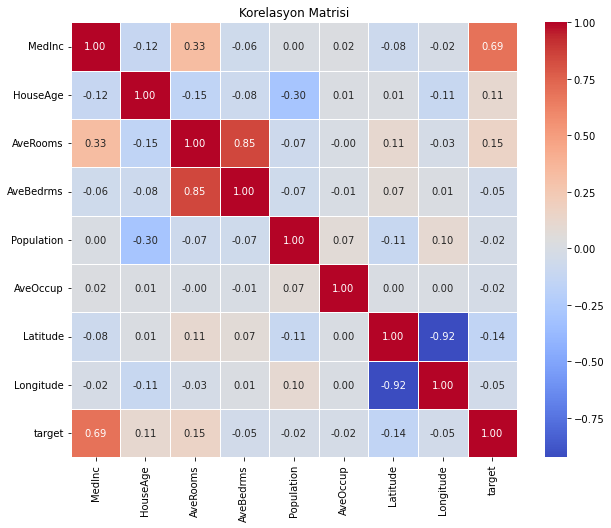

In [9]:
# Korelasyon matrisi
corr_matrix = df.corr()

# Isı haritası
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasyon Matrisi")
plt.show()


# Görüldüğü üzere target/hedef değişken) ile en yüksek korealsyona sahip sütun MedInc sütunudur.

In [10]:

# Bağımsız ve bağımlı değişkenler
X = df[['MedInc']]  # Bağımsız değişken
y = df['target']  # Bağımlı değişken (ev fiyatları)


In [11]:
# Veriyi eğitim ve test setlerine böldüm (%80 eğitim, %20 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Modeli oluşturdum
model = LinearRegression()


In [13]:
#Model eğittim Linear Regression ile
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Eğitilen Modele tahmin yaptırdım
y_pred = model.predict(X_test)


In [15]:

# Modelin performansını ölçtüm
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Skoru: {r2:.4f}")

Mean Squared Error (MSE): 0.7091
R² Skoru: 0.4589


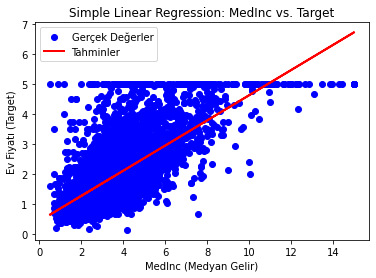

In [17]:

# Regresyon doğrusunu görselleştirdim
plt.scatter(X_test.values.ravel(), y_test, color='blue', label="Gerçek Değerler")
plt.plot(X_test.values.ravel(), y_pred, color='red', linewidth=2, label="Tahminler")

plt.xlabel("MedInc (Medyan Gelir)")
plt.ylabel("Ev Fiyatı (Target)")
plt.title("Simple Linear Regression: MedInc vs. Target")
plt.legend()
plt.show()

# Multi Linear Regression

In [18]:
# Bu kez birden target dışında kalan tüm sütunları dahil ederek Multi Linear Regression ile modeli eğiteceğim.
# Bağımsız değişkenler (tüm sütunlar, 'target' hariç)
X_multi = df.drop(columns=['target'])
y_multi = df['target']  # Bağımlı değişken



In [19]:
# Veriyi eğitim ve test setlerine ayırdım aynı şekilde (%80 eğitim, %20 test)
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)


In [20]:
# Modeli oluşturdum
multi_model = LinearRegression()


In [21]:
multi_model.fit(X_train_m, y_train_m)


LinearRegression()

In [23]:

# Modele tahmin yaptırdım
y_pred_m = multi_model.predict(X_test_m)

# Modelin performansını değerlendirdim burada
mse_m = mean_squared_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)

print(f"Multiple Linear Regression - Mean Squared Error (MSE): {mse_m:.4f}")
print(f"Multiple Linear Regression - R² Skoru: {r2_m:.4f}")

Multiple Linear Regression - Mean Squared Error (MSE): 0.5559
Multiple Linear Regression - R² Skoru: 0.5758


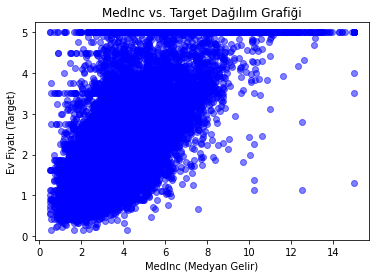

In [30]:
plt.scatter(df['MedInc'], df['target'], alpha=0.5, color='blue')
plt.xlabel("MedInc (Medyan Gelir)")
plt.ylabel("Ev Fiyatı (Target)")
plt.title("MedInc vs. Target Dağılım Grafiği")
plt.show()


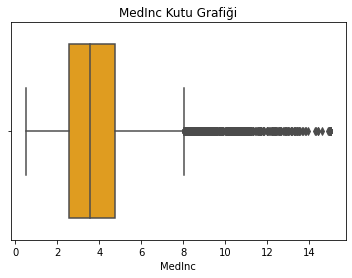

In [31]:
sns.boxplot(x=df['MedInc'], color='orange')
plt.title("MedInc Kutu Grafiği")
plt.show()


Text(0.5, 1.0, 'Orijinal Dağılım')

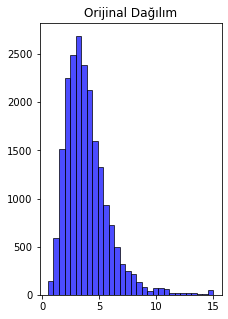

In [32]:
# Orijinal verinin histogramı
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.hist(df['MedInc'], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title("Orijinal Dağılım")

Text(0.5, 1.0, 'Log Dönüşümü')

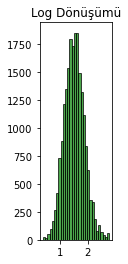

In [33]:
# Log transformation uygulanmış halinin görünümü
df['MedInc_log'] = np.log1p(df['MedInc'])
plt.subplot(1, 4, 2)
plt.hist(df['MedInc_log'], bins=30, color='green', alpha=0.7, edgecolor='black')
plt.title("Log Dönüşümü")

Text(0.5, 1.0, 'Karekök Dönüşümü')

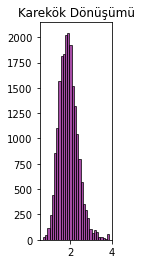

In [34]:
# Square Root (Karekök) dönüşümü
df['MedInc_sqrt'] = np.sqrt(df['MedInc'])
plt.subplot(1, 4, 3)
plt.hist(df['MedInc_sqrt'], bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.title("Karekök Dönüşümü")

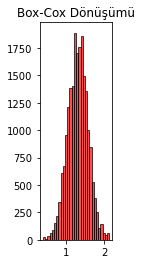

In [36]:
# Box-Cox dönüşümü (Pozitif değerler gerektirir, bu yüzden min değeri düzelttim)
df['MedInc_boxcox'], _ = boxcox(df['MedInc'] + 1)  # +1 ekleyerek negatif değerleri önledim
plt.subplot(1, 4, 4)
plt.hist(df['MedInc_boxcox'], bins=30, color='red', alpha=0.7, edgecolor='black')
plt.title("Box-Cox Dönüşümü")

plt.show()

In [39]:
# Test fonksiyonu
def normality_test(data, name):
    stat, p = normaltest(data)
    print(f"{name} için D'Agostino K² Testi: p-value = {p:.4f}")
    if p < 0.05:
        print(f"{name} normal DAĞILMIYOR \n")
    else:
        print(f"{name} normal DAĞILIYOR \n")

In [41]:
# Log dönüşümü
df['MedInc_log'] = np.log1p(df['MedInc'])

# Square Root (Karekök) dönüşümü
df['MedInc_sqrt'] = np.sqrt(df['MedInc'])

# Box-Cox dönüşümü (Sadece pozitif değerler için çalışır, bu yüzden +1 ekliyoruz)
df['MedInc_boxcox'], _ = boxcox(df['MedInc'] + 1)


In [42]:
# Orijinal ve dönüşmüş verileri test ettim
normality_test(df['MedInc'], "Orijinal MedInc")
normality_test(df['MedInc_log'], "Log Dönüşümü")
normality_test(df['MedInc_sqrt'], "Karekök Dönüşümü")
normality_test(df['MedInc_boxcox'], "Box-Cox Dönüşümü")

Orijinal MedInc için D'Agostino K² Testi: p-value = 0.0000
Orijinal MedInc normal DAĞILMIYOR 

Log Dönüşümü için D'Agostino K² Testi: p-value = 0.0000
Log Dönüşümü normal DAĞILMIYOR 

Karekök Dönüşümü için D'Agostino K² Testi: p-value = 0.0000
Karekök Dönüşümü normal DAĞILMIYOR 

Box-Cox Dönüşümü için D'Agostino K² Testi: p-value = 0.0168
Box-Cox Dönüşümü normal DAĞILMIYOR 

